<b>  Part - (1) : Develop a neural network based classification network from scratch: </b>  This programming assignment uses MNIST digit dataset. It consists of large collection of handwritten digits from 0 to 9. These images are formated as 28x28 pixel gray scale images. The objective of this programming assignment is to design a neural network architecture that takes input as 28x28 image (or 784 dimensional vector) as input and predicts the digit information in it. Although there are diffrent varieties of neural network architecture to solve this task, this programming assignment uses only the feed forward network.  

<dt> <h6> 1. Load MNIST data and create train, test splits </dt> </h6>

<dd> <h6> - The MNIST dataset consists of around 70,000 images. Divide the dataset into two segments: training and testing. Allocate 60,000 images for training and 10,000 images for testing
</dd> </h6>
<dd> <h6> - Code for downloading the data and creating train-test splits is provided </dd> </h6>

<dt> <h6> 2. Design a simple classification network </dt> </h6>

<dd> <h6> - Let us use three layer feed-forward neral network. Use 512 nodes in the hidden layers and 10 nodes in the output layer. The output $\textbf{y}$ from the input $\textbf{x}$ is computed as follows </dd> </h6>
<dd> <h6> <center> $ \textbf{y} = h(\textbf{W}_{3}g(\textbf{W}_{2}g(\textbf{W}_{1}\textbf{x}))) $ </center> </dd> </h6>
<dd> <h6> where $\textbf{W}_{1} \in \mathcal{R}^{512 \times 768}$,$\textbf{W}_{2} \in \mathcal{R}^{512 \times 512}$,$\textbf{W}_{3} \in \mathcal{R}^{10 \times 512} $ are the parameters of the network. g(.) is the hidden layer activation function. h(.) is the output layer activation function   </dd> </h6>
<dd> <h6> - Consider g(.) as ReLU activation function. Softmax activation function should be used at the last layer h(.), to get the posterior probability of the classes. </dd> </h6>

<dt> <h6> - Training classification network: </dt> </h6>

<dd> <h6>  - Flatten the 28x28 images to arrive at 784 dimensional vector.  </dd> </h6>  
<dd> <h6> - Randomly initialize the parameters of network, $\textbf{W}_{1} \in \mathcal{R}^{768 \times 512}$,$\textbf{W}_{2} \in \mathcal{R}^{512 \times 512}$,$\textbf{W}_{3} \in \mathcal{R}^{512 \times 10}$  </dd> </h6>
<dd> <h6> - Feedforward the batch of input vectors to get the posterior probability of classes.  </dd> </h6>
<dd> <h6> - Compute the loss between the estimated posterior probabilities and the true targets. </dd> </h6>  
<dd> <h6> - Update the parameters of network to minimize the loss function.  </dd> </h6>
<dd> <h6> <dd> <h6> - Backpropagate the loss function to get the gradients.  </dd> </h6> </dd> </h6>  

<dd> <h6> <dd> <h6> - You can use stochastic gradient descent (SGD) optimization algorithm to update the parameters.  </dd> </h6> </dd> </h6>  
<dd> <h6> <dd> <h6> - Cleverly set the hyperparameters involved in this optimization process. </dd> </h6> </dd> </h6>

<dt> <h6> 3. Evaluate the performance of classification network </dd> </h6>
<dd> <h6> - feed-forward the MNIST data through the trained classification network to get class posteriors. </dd> </h6>  
<dd> <h6> - Assign the input to the class having maximum posterior probability </dd> </h6>  
<dd> <h6> - Compute the loss and accuaracy </dd> </h6>  
<dd> <h6> - Report your observations </dd> </h6>  





 <center> <h1> <b> Pattern Recognition and Machine Learning (EE5610 - EE2802 - AI2000 - AI5000) </b> </h1> </center>

<b> Programming Assignment - 04 : Neural Networks </b>


This programming assignment gives you a chance to perform the classification task using neural networks. You will get to build a neural network from scratch and train and test it on a standard classification dataset. Further you will learn different tricks and techniques to train a neural network eficiently by observing few important issues and trying to overcome them. This includes observing the performance of the network for different activation functions and optimization algorithms. We will conclude with implementation of various regularization techniques to overcome the problems of overfitting and vanishing gradients.

<b> Instructions </b>
1. Plagiarism is strictly prohibited.
2. Delayed submissions will be penalized with a scaling factor of 0.5 per day.
3. Please DO NOT use any machine learning libraries unless and otherwise specified.








In [ ]:
#All imports
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import collections

In [ ]:
import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(x_train.shape[0], -1) / 255.0
x_test = x_test.reshape(x_test.shape[0], -1) / 255.0
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)
print("Flattened Testing data", x_test)
print("Testing labels", y_test)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Flattened Testing data [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Testing labels [[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [ ]:
##################################################
#Load MNIST data.
##################################################
import torchvision.datasets as datasets
mnist_trainset = datasets.MNIST(root='./data', train=True, download=True, transform=None)
mnist_testset = datasets.MNIST(root='./data', train=False, download=True, transform=None)

#Training data
mnist_traindata = mnist_trainset.data.numpy()
mnist_trainlabel = mnist_trainset.targets.numpy()
print("\nTraining data",mnist_traindata.shape)
print("Training labels",mnist_trainlabel.shape)

#Testing data
mnist_testdata = mnist_testset.data.numpy()
mnist_testlabel = mnist_testset.targets.numpy()
print("Testing data",mnist_testdata.shape)
print("Testing labels",mnist_testlabel.shape)


Training data (60000, 28, 28)
Training labels (60000,)
Testing data (10000, 28, 28)
Testing labels (10000,)


In [ ]:
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

print(mnist_traindata.shape,mnist_trainlabel.shape)
print(mnist_testdata.shape,mnist_testlabel.shape)

#print(mnist_traindata[0]/255.0)
#print(x_train[0])

a=mnist_traindata[0]/255.0
a=a.reshape(-1,28*28)
b=x_train[0]
print(a.shape)
print(b.shape)
print(a==b)


(60000, 784) (60000, 10)
(10000, 784) (10000, 10)
(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)
(1, 784)
(784,)
[[ True  True  True  True  True  True  True  True  True  True  True  True
   True  True  True  True  True  True  True  True  True  True  True  True
   True  True  True  True  True  True  True  True  True  True  True  True
   True  True  True  True  True  True  True  True  True  True  True  True
   True  True  True  True  True  True  True  True  True  True  True  True
   True  True  True  True  True  True  True  True  True  True  True  True
   True  True  True  True  True  True  True  True  True  True  True  True
   True  True  True  True  True  True  True  True  True  True  True  True
   True  True  True  True  True  True  True  True  True  True  True  True
   True  True  True  True  True  True  True  True  True  True  True  True
   True  True  True  True  True  True  True  True  True  True  True  True
   True  True  True  True  True  True  True  True  True  True  True  T

In [ ]:
##################################################
# Load MNIST data.
##################################################
import numpy as np
import torchvision.datasets as datasets

# Load MNIST datasets
mnist_trainset = datasets.MNIST(root='./data', train=True, download=True, transform=None)
mnist_testset = datasets.MNIST(root='./data', train=False, download=True, transform=None)

# Training data
mnist_traindata = mnist_trainset.data.numpy().reshape(-1, 28*28)  # Flatten images
mnist_trainlabel = mnist_trainset.targets.numpy()
print("Training data", mnist_traindata.shape)
print("Training labels", mnist_trainlabel.shape)

# Testing data
mnist_testdata = mnist_testset.data.numpy().reshape(-1, 28*28)  # Flatten images
mnist_testlabel = mnist_testset.targets.numpy()
print("Testing data", mnist_testdata.shape)
print("Testing labels", mnist_testlabel.shape)

##################################################
# Define the architecture
##################################################

def ReLu(inp):
    return np.maximum(0, inp)

def gradReLu(inp):
    return np.where(inp > 0, 1, 0)

def softmax(inp):
    exp_inp = np.exp(inp - np.max(inp, axis=1, keepdims=True))  # Subtract max for numerical stability
    return exp_inp / np.sum(exp_inp, axis=1, keepdims=True)

def fwdPropagate(inputs, weights, activation_function = ReLu):
    W1, W2, W3 = weights
    a1 = inputs @ W1
    h1 = activation_function(a1)
    a2 = h1 @ W2
    h2 = activation_function(a2)
    a3 = h2 @ W3
    y = softmax(a3)

    return {
        'a1': a1,
        'h1': h1,
        'a2': a2,
        'h2': h2,
        'a3': a3,
        'y': y
    }

def computeGradients(inputs, targets, weights, activations, activation_grad=gradReLu):
    W1, W2, W3 = weights
    a1, h1, a2, h2, a3, y = activations['a1'], activations['h1'], activations['a2'], activations['h2'], activations['a3'], activations['y']

    delta3 = y - targets
    dj_dw3 = h2.T @ delta3

    delta2 = (delta3 @ W3.T) * activation_grad(a2)
    dj_dw2 = h1.T @ delta2

    delta1 = (delta2 @ W2.T) * activation_grad(a1)
    dj_dw1 = inputs.T @ delta1

    return [dj_dw1, dj_dw2, dj_dw3]

def applyGradients(weights, gradients, learning_rate):
    W1, W2, W3 = weights
    dj_dw1, dj_dw2, dj_dw3 = gradients

    W1 -= learning_rate * dj_dw1
    W2 -= learning_rate * dj_dw2
    W3 -= learning_rate * dj_dw3

    return [W1, W2, W3]

def backPropagate(inputs, targets, weights, activations, learning_rate, activation_grad = gradReLu):
    gradients = computeGradients(inputs, targets, weights, activations, activation_grad)
    weights = applyGradients(weights, gradients, learning_rate)
    return weights

##################################################
# Train the network
##################################################

def training(inputs, targets_idx, batch_size=128, epochs=30, train_val_split=0.8, learning_rate=0.001, activation_function = ReLu, activation_grad = gradReLu):
    hidden_units = 512
    n_classes = 10
    n_samples, n_features = inputs.shape

    # Shuffle and split
    indices = np.arange(n_samples)
    np.random.shuffle(indices)
    inputs = inputs[indices]
    targets_idx = targets_idx[indices]

    n_train = int(n_samples * train_val_split)
    inputs_train, inputs_val = inputs[:n_train], inputs[n_train:]
    targets_train, targets_val = targets_idx[:n_train], targets_idx[n_train:]

    # Normalize
    inputs_train = inputs_train.astype(np.float32) / 255.0
    inputs_val = inputs_val.astype(np.float32) / 255.0

    # Initialize weights
    W1 = np.random.randn(n_features, hidden_units) * 0.01
    W2 = np.random.randn(hidden_units, hidden_units) * 0.01
    W3 = np.random.randn(hidden_units, n_classes) * 0.01
    weights = [W1, W2, W3]

    for epoch in range(epochs):
        perm = np.random.permutation(n_train)
        inputs_train = inputs_train[perm]
        targets_train = targets_train[perm]

        n_batches = inputs_train.shape[0] // batch_size

        for batch in range(n_batches):
            start = batch * batch_size
            end = start + batch_size
            inputs_batch = inputs_train[start:end]
            targets_batch = targets_train[start:end]

            # One-hot encode the batch labels
            targets_batch_oh = np.eye(n_classes)[targets_batch]

            # Forward and backward
            activations = fwdPropagate(inputs_batch, weights, activation_function)
            weights = backPropagate(inputs_batch, targets_batch_oh, weights, activations, learning_rate, activation_grad)

        # Training performance
        activations_train = fwdPropagate(inputs_train, weights, activation_function)
        outputs_train = activations_train['y']

        activations_val = fwdPropagate(inputs_val, weights, activation_function)
        outputs_val = activations_val['y']

        train_preds = np.argmax(outputs_train, axis=1)
        train_acc = np.mean(train_preds == targets_train)
        train_loss = np.mean(np.sum((outputs_train - np.eye(n_classes)[targets_train]) ** 2, axis=1))

        val_preds = np.argmax(outputs_val, axis=1)
        val_acc = np.mean(val_preds == targets_val)
        val_loss = np.mean(np.sum((outputs_val - np.eye(n_classes)[targets_val]) ** 2, axis=1))

        print(f"Epoch {epoch+1}/{epochs} - "
              f"Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f} - "
              f"Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.4f}")

    return weights

# Call training
weights = training(mnist_traindata, mnist_trainlabel, batch_size=128, epochs=10, train_val_split=0.8, learning_rate=0.001)

##################################################
# Evaluate on test data
##################################################
test_inputs = mnist_testdata.astype(np.float32) / 255.0
test_targets = mnist_testlabel

# Forward on test
activations_test = fwdPropagate(test_inputs, weights)
outputs_test = activations_test['y']

test_preds = np.argmax(outputs_test, axis=1)
test_acc = np.mean(test_preds == test_targets)
test_loss = np.mean(np.sum((outputs_test - np.eye(10)[test_targets]) ** 2, axis=1))

print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_acc:.4f}")


Training data (60000, 784)
Training labels (60000,)
Testing data (10000, 784)
Testing labels (10000,)
Epoch 1/10 - Train Loss: 0.2035, Train Acc: 0.8643 - Val Loss: 0.2044, Val Acc: 0.8613
Epoch 2/10 - Train Loss: 0.1237, Train Acc: 0.9193 - Val Loss: 0.1263, Val Acc: 0.9183
Epoch 3/10 - Train Loss: 0.0865, Train Acc: 0.9439 - Val Loss: 0.0879, Val Acc: 0.9428
Epoch 4/10 - Train Loss: 0.0676, Train Acc: 0.9562 - Val Loss: 0.0727, Val Acc: 0.9526
Epoch 5/10 - Train Loss: 0.0505, Train Acc: 0.9684 - Val Loss: 0.0581, Val Acc: 0.9635
Epoch 6/10 - Train Loss: 0.0451, Train Acc: 0.9718 - Val Loss: 0.0553, Val Acc: 0.9638
Epoch 7/10 - Train Loss: 0.0353, Train Acc: 0.9782 - Val Loss: 0.0465, Val Acc: 0.9697
Epoch 8/10 - Train Loss: 0.0325, Train Acc: 0.9797 - Val Loss: 0.0450, Val Acc: 0.9708
Epoch 9/10 - Train Loss: 0.0240, Train Acc: 0.9854 - Val Loss: 0.0388, Val Acc: 0.9743
Epoch 10/10 - Train Loss: 0.0208, Train Acc: 0.9872 - Val Loss: 0.0374, Val Acc: 0.9752
Test Loss: 0.0383, Test Acc

<b> Report your observations </b>

1. Our three layer neural network performs extremely well on the MNSIT data set,which validates the fact that neural networks are universal approximators.

2. Proper initialisation is important. If we initialise to larger values, training time increases.

3. Keeping the learning rate < 0.01 provides good convergence speed.

4. Normalizing the input pixels by dividing with 255 makes the training faster and smoother. Test accuracy also shows considerable imporvement.



<b> Part - (2) : Understanding activation functions: </b> In this part you will learn to use different activation functions for the classification task and compare their performances.

<dt> <h6> 1. Train MNIST digit classification network with different activation functions i.e. Sigmoid, Tanh, ReLU, LeakyReLU etc. You can stick to stochastic gradient descent optimization algorithm for this part </dt> </h6>
<dt> <h6> 2. Report the accuray on MNIST test data for all the experiments. Write down your observations in the report.</br> </dt> </h6>



In [ ]:
##################################################
#Train the network with different activation functions
##################################################
# Define Sigmoid activation function and its gradient
def sigmoid(inp):
    return 1 / (1 + np.exp(-inp))

def gradSigmoid(inp):
    sig = sigmoid(inp)
    return sig * (1 - sig)

# Define Tanh activation function and its gradient
def tanh(inp):
    return np.tanh(inp)

def gradTanh(inp):
    return 1 - np.tanh(inp)**2

# Define Leaky ReLU activation function and its gradient
def leakyReLu(inp, alpha=0.01):
    return np.where(inp > 0, inp, alpha * inp)

def gradLeakyReLu(inp, alpha=0.01):
    return np.where(inp > 0, 1, alpha)

##################################################
#Evaluate the performance on MNIST test data
##################################################
# List of activation functions and their gradients
activations = [
    ("ReLU", ReLu, gradReLu),
    ("Sigmoid", sigmoid, gradSigmoid),
    ("Tanh", tanh, gradTanh),
    ("LeakyReLU", leakyReLu, gradLeakyReLu)
]

# Train and evaluate with each activation
for name, activation_func, activation_grad_func in activations:
    print(f"\nTraining with {name} activation function...")

    # Train
    weights = training(
        mnist_traindata,
        mnist_trainlabel,
        batch_size=128,
        epochs=10,
        train_val_split=0.8,
        learning_rate=0.001,
        activation_function=activation_func,
        activation_grad=activation_grad_func
    )

    # Test evaluation
    test_inputs = mnist_testdata.astype(np.float32) / 255.0
    test_targets = mnist_testlabel

    activations_test = fwdPropagate(test_inputs, weights, activation_func)
    outputs_test = activations_test['y']

    test_preds = np.argmax(outputs_test, axis=1)
    test_acc = np.mean(test_preds == test_targets)
    test_loss = np.mean(np.sum((outputs_test - np.eye(10)[test_targets]) ** 2, axis=1))

    print(f"{name} - Test Loss: {test_loss:.4f}, Test Accuracy: {test_acc:.4f}")


Training with ReLU activation function...
Epoch 1/10 - Train Loss: 0.1976, Train Acc: 0.8690 - Val Loss: 0.1966, Val Acc: 0.8692
Epoch 2/10 - Train Loss: 0.1191, Train Acc: 0.9227 - Val Loss: 0.1209, Val Acc: 0.9210
Epoch 3/10 - Train Loss: 0.0949, Train Acc: 0.9387 - Val Loss: 0.1016, Val Acc: 0.9341
Epoch 4/10 - Train Loss: 0.0643, Train Acc: 0.9589 - Val Loss: 0.0724, Val Acc: 0.9528
Epoch 5/10 - Train Loss: 0.0527, Train Acc: 0.9669 - Val Loss: 0.0635, Val Acc: 0.9573
Epoch 6/10 - Train Loss: 0.0419, Train Acc: 0.9742 - Val Loss: 0.0547, Val Acc: 0.9648
Epoch 7/10 - Train Loss: 0.0381, Train Acc: 0.9758 - Val Loss: 0.0525, Val Acc: 0.9653
Epoch 8/10 - Train Loss: 0.0325, Train Acc: 0.9791 - Val Loss: 0.0488, Val Acc: 0.9670
Epoch 9/10 - Train Loss: 0.0300, Train Acc: 0.9813 - Val Loss: 0.0486, Val Acc: 0.9685
Epoch 10/10 - Train Loss: 0.0273, Train Acc: 0.9828 - Val Loss: 0.0474, Val Acc: 0.9696
ReLU - Test Loss: 0.0434, Test Accuracy: 0.9707

Training with Sigmoid activation func

<b>Report your observations</b>
1. Test accuracy was the highest with LeakyReLU, then ReLU, then tanh, and finally sigmoid.

1. LeakyReLU converged fastest in training and validation loss, because it stops non-negative inputs from going to zero (dead neurons).

2. The sigmoid and tanh activation functions showed lower accuracy and **slower training speed**, mostly because of **vanishing gradients**.

3. If the outputs of the neurons are printed, it is clearly visible that some neuronal outputs die out and go to **zero with ReLU**, but such a problem is avoided with LeakyReLU.

<b> Part - (3) : Understanding optimization algorithms: </b> In this part you will learn to use different optimiztion algorithm apart from SGD.

<dt> <h6> 1. Using the best activation function from Part - (2), train the classification network using Adam optimization algorithm. </dt> </h6>
<dt> <h6> 3. Compare the accuracy of the networks trained with SGD and Adam optimization algorithms. </dt> </h6>
<dt> <h6> 4. Report your observations. </dt> </h6>

Training with SGD and LeakyReLU
Epoch 0/ 10 - Train Loss: 0.9000, Train Acc: 0.0686 - Val Loss: 0.9000, Val Acc: 0.0725
Epoch 1/10 - Train Loss: 0.1815, Train Acc: 0.8837 - Val Loss: 0.1899, Val Acc: 0.8771
Epoch 2/10 - Train Loss: 0.1201, Train Acc: 0.9214 - Val Loss: 0.1277, Val Acc: 0.9155
Epoch 3/10 - Train Loss: 0.0846, Train Acc: 0.9443 - Val Loss: 0.0927, Val Acc: 0.9399
Epoch 4/10 - Train Loss: 0.0664, Train Acc: 0.9574 - Val Loss: 0.0755, Val Acc: 0.9505
Epoch 5/10 - Train Loss: 0.0553, Train Acc: 0.9646 - Val Loss: 0.0647, Val Acc: 0.9580
Epoch 6/10 - Train Loss: 0.0460, Train Acc: 0.9705 - Val Loss: 0.0570, Val Acc: 0.9636
Epoch 7/10 - Train Loss: 0.0341, Train Acc: 0.9786 - Val Loss: 0.0464, Val Acc: 0.9699
Epoch 8/10 - Train Loss: 0.0304, Train Acc: 0.9807 - Val Loss: 0.0442, Val Acc: 0.9711
Epoch 9/10 - Train Loss: 0.0266, Train Acc: 0.9830 - Val Loss: 0.0419, Val Acc: 0.9744
Epoch 10/10 - Train Loss: 0.0230, Train Acc: 0.9857 - Val Loss: 0.0408, Val Acc: 0.9742


Trainin

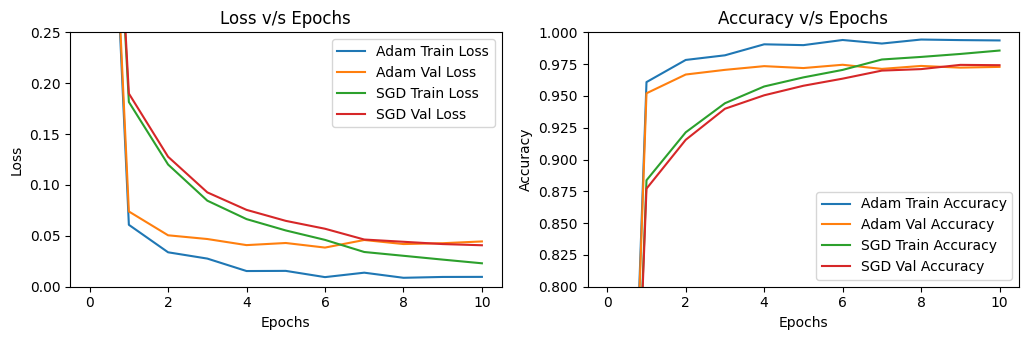

In [ ]:
##################################################
# Adam Optimizer
##################################################
def adam_optimizer(weights, gradients, learning_rate=0.001, beta1=0.9, beta2=0.999, epsilon=1e-8, m=None, v=None, t=1):
    if m is None:
        m = [np.zeros_like(w) for w in weights]
        v = [np.zeros_like(w) for w in weights]

    # Update running averages of the gradients
    m = [beta1 * m_i + (1 - beta1) * grad for m_i, grad in zip(m, gradients)]
    v = [beta2 * v_i + (1 - beta2) * (grad ** 2) for v_i, grad in zip(v, gradients)]

    # Correct bias in the first moment estimate
    m_hat = [m_i / (1 - beta1 ** t) for m_i in m]
    v_hat = [v_i / (1 - beta2 ** t) for v_i in v]

    # Update weights
    weights = [w - (learning_rate * m_i / (np.sqrt(v_i) + epsilon)) for w, m_i, v_i in zip(weights, m_hat, v_hat)]

    return weights, m, v, t + 1

##################################################
# Train using SGD
##################################################
def training(inputs, targets_idx, batch_size=128, epochs=30, train_val_split=0.8, learning_rate=0.001, activation_function=ReLu, activation_grad=gradReLu):
    hidden_units = 512
    n_classes = 10
    n_samples, n_features = inputs.shape

    # Shuffle and split
    indices = np.arange(n_samples)
    np.random.shuffle(indices)
    inputs = inputs[indices]
    targets_idx = targets_idx[indices]

    n_train = int(n_samples * train_val_split)
    inputs_train, inputs_val = inputs[:n_train], inputs[n_train:]
    targets_train, targets_val = targets_idx[:n_train], targets_idx[n_train:]

    # Normalize
    inputs_train = inputs_train.astype(np.float32) / 255.0
    inputs_val = inputs_val.astype(np.float32) / 255.0

    # Initialize weights
    W1 = np.random.randn(n_features, hidden_units) * 0.01
    W2 = np.random.randn(hidden_units, hidden_units) * 0.01
    W3 = np.random.randn(hidden_units, n_classes) * 0.01
    weights = [W1, W2, W3]

    # Initialize history dictionary
    history = {'train_loss': [], 'val_loss': [], 'train_acc': [], 'val_acc': []}

    # ======== Record initial loss and acc before training ========
    activations_train = fwdPropagate(inputs_train, weights, activation_function)
    outputs_train = activations_train['y']

    activations_val = fwdPropagate(inputs_val, weights, activation_function)
    outputs_val = activations_val['y']

    train_preds = np.argmax(outputs_train, axis=1)
    train_acc = np.mean(train_preds == targets_train)
    train_loss = np.mean(np.sum((outputs_train - np.eye(n_classes)[targets_train]) ** 2, axis=1))

    val_preds = np.argmax(outputs_val, axis=1)
    val_acc = np.mean(val_preds == targets_val)
    val_loss = np.mean(np.sum((outputs_val - np.eye(n_classes)[targets_val]) ** 2, axis=1))

    history['train_loss'].append(train_loss)
    history['val_loss'].append(val_loss)
    history['train_acc'].append(train_acc)
    history['val_acc'].append(val_acc)

    print(f"Epoch 0/ {epochs} - "
          f"Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f} - "
          f"Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.4f}")
    # =============================================================

    for epoch in range(1, epochs+1):
        perm = np.random.permutation(n_train)
        inputs_train = inputs_train[perm]
        targets_train = targets_train[perm]

        n_batches = inputs_train.shape[0] // batch_size

        for batch in range(n_batches):
            start = batch * batch_size
            end = start + batch_size
            inputs_batch = inputs_train[start:end]
            targets_batch = targets_train[start:end]

            # One-hot encode the batch labels
            targets_batch_oh = np.eye(n_classes)[targets_batch]

            # Forward and backward
            activations = fwdPropagate(inputs_batch, weights, activation_function)
            weights = backPropagate(inputs_batch, targets_batch_oh, weights, activations, learning_rate, activation_grad)

        # Training performance after epoch
        activations_train = fwdPropagate(inputs_train, weights, activation_function)
        outputs_train = activations_train['y']

        activations_val = fwdPropagate(inputs_val, weights, activation_function)
        outputs_val = activations_val['y']

        train_preds = np.argmax(outputs_train, axis=1)
        train_acc = np.mean(train_preds == targets_train)
        train_loss = np.mean(np.sum((outputs_train - np.eye(n_classes)[targets_train]) ** 2, axis=1))

        val_preds = np.argmax(outputs_val, axis=1)
        val_acc = np.mean(val_preds == targets_val)
        val_loss = np.mean(np.sum((outputs_val - np.eye(n_classes)[targets_val]) ** 2, axis=1))

        # Save metrics to history
        history['train_loss'].append(train_loss)
        history['val_loss'].append(val_loss)
        history['train_acc'].append(train_acc)
        history['val_acc'].append(val_acc)

        print(f"Epoch {epoch}/{epochs} - "
              f"Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f} - "
              f"Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.4f}")

    return weights, history

##################################################
# Train using Adam
##################################################
def training_with_adam(inputs, targets_idx, batch_size=128, epochs=30, train_val_split=0.8, learning_rate=0.001, activation_function=ReLu, activation_grad=gradReLu):
    hidden_units = 512
    n_classes = 10
    n_samples, n_features = inputs.shape

    # Store history
    history = {
        'train_loss': [],
        'val_loss': [],
        'train_acc': [],
        'val_acc': []
    }

    # Shuffle and split
    indices = np.arange(n_samples)
    np.random.shuffle(indices)
    inputs = inputs[indices]
    targets_idx = targets_idx[indices]

    n_train = int(n_samples * train_val_split)
    inputs_train, inputs_val = inputs[:n_train], inputs[n_train:]
    targets_train, targets_val = targets_idx[:n_train], targets_idx[n_train:]

    # Normalize
    inputs_train = inputs_train.astype(np.float32) / 255.0
    inputs_val = inputs_val.astype(np.float32) / 255.0

    # Initialize weights
    W1 = np.random.randn(n_features, hidden_units) * 0.01
    W2 = np.random.randn(hidden_units, hidden_units) * 0.01
    W3 = np.random.randn(hidden_units, n_classes) * 0.01
    weights = [W1, W2, W3]

    # Adam parameters
    m = [np.zeros_like(w) for w in weights]
    v = [np.zeros_like(w) for w in weights]
    t = 1

    # ======== Record initial loss and acc before training ========
    activations_train = fwdPropagate(inputs_train, weights, activation_function)
    outputs_train = activations_train['y']

    activations_val = fwdPropagate(inputs_val, weights, activation_function)
    outputs_val = activations_val['y']

    train_preds = np.argmax(outputs_train, axis=1)
    train_acc = np.mean(train_preds == targets_train)
    train_loss = np.mean(np.sum((outputs_train - np.eye(n_classes)[targets_train]) ** 2, axis=1))

    val_preds = np.argmax(outputs_val, axis=1)
    val_acc = np.mean(val_preds == targets_val)
    val_loss = np.mean(np.sum((outputs_val - np.eye(n_classes)[targets_val]) ** 2, axis=1))

    history['train_loss'].append(train_loss)
    history['val_loss'].append(val_loss)
    history['train_acc'].append(train_acc)
    history['val_acc'].append(val_acc)

    print(f"Epoch 0/ {epochs} - "
          f"Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f} - "
          f"Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.4f}")
    # =============================================================

    for epoch in range(1, epochs+1):
        perm = np.random.permutation(n_train)
        inputs_train = inputs_train[perm]
        targets_train = targets_train[perm]

        n_batches = inputs_train.shape[0] // batch_size

        for batch in range(n_batches):
            start = batch * batch_size
            end = start + batch_size
            inputs_batch = inputs_train[start:end]
            targets_batch = targets_train[start:end]

            # One-hot encode the batch labels
            targets_batch_oh = np.eye(n_classes)[targets_batch]

            # Forward and backward
            activations = fwdPropagate(inputs_batch, weights, activation_function)
            gradients = computeGradients(inputs_batch, targets_batch_oh, weights, activations, activation_grad)

            # Update weights using Adam
            weights, m, v, t = adam_optimizer(weights, gradients, learning_rate, m=m, v=v, t=t)

        # Training performance after epoch
        activations_train = fwdPropagate(inputs_train, weights, activation_function)
        outputs_train = activations_train['y']

        activations_val = fwdPropagate(inputs_val, weights, activation_function)
        outputs_val = activations_val['y']

        train_preds = np.argmax(outputs_train, axis=1)
        train_acc = np.mean(train_preds == targets_train)
        train_loss = np.mean(np.sum((outputs_train - np.eye(n_classes)[targets_train]) ** 2, axis=1))

        val_preds = np.argmax(outputs_val, axis=1)
        val_acc = np.mean(val_preds == targets_val)
        val_loss = np.mean(np.sum((outputs_val - np.eye(n_classes)[targets_val]) ** 2, axis=1))

        history['train_loss'].append(train_loss)
        history['val_loss'].append(val_loss)
        history['train_acc'].append(train_acc)
        history['val_acc'].append(val_acc)

        print(f"Epoch {epoch}/{epochs} - "
              f"Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f} - "
              f"Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.4f}")

    return weights, history

##################################################
# Train and Plot
##################################################
# Train using SGD
print("Training with SGD and LeakyReLU")
weights_sgd, history = training(mnist_traindata, mnist_trainlabel, batch_size=128, epochs=10, learning_rate=0.001, activation_function=leakyReLu, activation_grad=gradLeakyReLu)

# Train using Adam
print("\nTraining with Adam and LeakyReLU")
weights_adam, history_adam = training_with_adam(mnist_traindata, mnist_trainlabel, batch_size=128, epochs=10, learning_rate=0.001, activation_function=leakyReLu, activation_grad=gradLeakyReLu)


# Test evaluation
test_inputs = mnist_testdata.astype(np.float32) / 255.0
test_targets = mnist_testlabel

activations_test = fwdPropagate(test_inputs, weights_sgd, activation_function=leakyReLu)
outputs_test = activations_test['y']

test_preds = np.argmax(outputs_test, axis=1)
test_acc = np.mean(test_preds == test_targets)
test_loss = np.mean(np.sum((outputs_test - np.eye(10)[test_targets]) ** 2, axis=1))

print(f"\nSGD - Test Loss: {test_loss:.4f}, Test Accuracy: {test_acc:.4f}")

activations_test = fwdPropagate(test_inputs, weights_adam, activation_function=leakyReLu)
outputs_test = activations_test['y']

test_preds = np.argmax(outputs_test, axis=1)
test_acc = np.mean(test_preds == test_targets)
test_loss = np.mean(np.sum((outputs_test - np.eye(10)[test_targets]) ** 2, axis=1))

print(f"Adam - Test Loss: {test_loss:.4f}, Test Accuracy: {test_acc:.4f}")

# Plot the loss and accuracy curves for both SGD and Adam
plt.figure(figsize=(11, 3.5), dpi=100)
plt.subplots_adjust(wspace=4.0)

# Training and validation loss
plt.subplot(1, 2, 1)
plt.plot(history_adam['train_loss'], label='Adam Train Loss')
plt.plot(history_adam['val_loss'], label='Adam Val Loss')
plt.plot(history['train_loss'], label='SGD Train Loss')
plt.plot(history['val_loss'], label='SGD Val Loss')
plt.ylim(0.0, 0.25)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title("Loss v/s Epochs")
plt.legend()

# Training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history_adam['train_acc'], label='Adam Train Accuracy')
plt.plot(history_adam['val_acc'], label='Adam Val Accuracy')
plt.plot(history['train_acc'], label='SGD Train Accuracy')
plt.plot(history['val_acc'], label='SGD Val Accuracy')
plt.ylim(0.8, 1.0)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title("Accuracy v/s Epochs")
plt.legend()

plt.tight_layout()
plt.show()

<b>Report your observations</b>

1. Adam optimizer converges much faster compared to SGD. Within the first few epochs, Adam significantly reduces the training and validation loss, while SGD takes longer.

2. Adam achieves a higher final validation accuracy than SGD.  

3. The training and validation curves for Adam are smoother and more stable compared to SGD, which shows more oscillations.  



<b> Part - (4) : Understanding regularization methods: </b> In this part of the assignment, you will learn about a few regularization techniques to reduce the overfitting problem. Using the above built network, include the following techniques to reduce the overfitting by retraining the network efficiently. Write down the accuracies for each case.
<dt> <h6> 1. Weight regularization: Add regularization term to the classification los </dt> </h6>
<dt> <h6> 2. Dropout with a probability of 0.2: Randomly drop the activation potentials of hidden neural with 0.2 probability. Disable the dropout layer in inference model. You can experiment with different dropout probabilities and report your observations.  </dt> </h6>
<dt> <h6> 3. Early stopping: Stop the network training when it is started to overfitting to training data. </dt> </h6>


In [ ]:
##################################################
# Updated Helper Functions
##################################################
def computeGradients(inputs, targets, weights, activations, activation_grad=gradReLu, l2_lambda=0.0):
    W1, W2, W3 = weights
    a1, h1, a2, h2, a3, y = activations['a1'], activations['h1'], activations['a2'], activations['h2'], activations['a3'], activations['y']

    delta3 = y - targets
    dj_dw3 = h2.T @ delta3 + l2_lambda * W3

    delta2 = (delta3 @ W3.T) * activation_grad(a2)
    dj_dw2 = h1.T @ delta2 + l2_lambda * W2

    delta1 = (delta2 @ W2.T) * activation_grad(a1)
    dj_dw1 = inputs.T @ delta1 + l2_lambda * W1

    return [dj_dw1, dj_dw2, dj_dw3]

def applyGradients(weights, gradients, learning_rate):
    W1, W2, W3 = weights
    dj_dw1, dj_dw2, dj_dw3 = gradients

    W1 -= learning_rate * dj_dw1
    W2 -= learning_rate * dj_dw2
    W3 -= learning_rate * dj_dw3

    return [W1, W2, W3]

def dropout_layer(x, drop_prob=0.2, training=True):
    if training:
        mask = np.random.binomial(1, 1 - drop_prob, size=x.shape) / (1 - drop_prob)
        return x * mask
    else:
        return x

def fwdPropagate(inputs, weights, activation_function=ReLu, drop_prob=0.0, training=True):
    W1, W2, W3 = weights
    a1 = inputs @ W1
    h1 = activation_function(a1)
    h1 = dropout_layer(h1, drop_prob, training)

    a2 = h1 @ W2
    h2 = activation_function(a2)
    h2 = dropout_layer(h2, drop_prob, training)

    a3 = h2 @ W3
    y = softmax(a3)

    return {
        'a1': a1,
        'h1': h1,
        'a2': a2,
        'h2': h2,
        'a3': a3,
        'y': y
    }

def backPropagate(inputs, targets, weights, activations, learning_rate, activation_grad=gradReLu, l2_lambda=0.0):
    gradients = computeGradients(inputs, targets, weights, activations, activation_grad, l2_lambda)
    weights = applyGradients(weights, gradients, learning_rate)
    return weights

##################################################
# Training Function
##################################################
def training(inputs, targets_idx, batch_size=128, epochs=30, train_val_split=0.8, learning_rate=0.001,
             activation_function=ReLu, activation_grad=gradReLu, l2_lambda=0.0, drop_prob=0.0, early_stopping=False, patience=5):

    hidden_units = 512
    n_classes = 10
    n_samples, n_features = inputs.shape

    # Shuffle and split
    indices = np.arange(n_samples)
    np.random.shuffle(indices)
    inputs = inputs[indices]
    targets_idx = targets_idx[indices]

    n_train = int(n_samples * train_val_split)
    inputs_train, inputs_val = inputs[:n_train], inputs[n_train:]
    targets_train, targets_val = targets_idx[:n_train], targets_idx[n_train:]

    # Normalize
    inputs_train = inputs_train.astype(np.float32) / 255.0
    inputs_val = inputs_val.astype(np.float32) / 255.0

    # Initialize weights
    W1 = np.random.randn(n_features, hidden_units) * 0.01
    W2 = np.random.randn(hidden_units, hidden_units) * 0.01
    W3 = np.random.randn(hidden_units, n_classes) * 0.01
    weights = [W1, W2, W3]

    best_val_loss = np.inf
    patience_counter = 0

    for epoch in range(epochs):
        perm = np.random.permutation(n_train)
        inputs_train = inputs_train[perm]
        targets_train = targets_train[perm]

        n_batches = inputs_train.shape[0] // batch_size

        for batch in range(n_batches):
            start = batch * batch_size
            end = start + batch_size
            inputs_batch = inputs_train[start:end]
            targets_batch = targets_train[start:end]

            # One-hot encode batch labels
            targets_batch_oh = np.eye(n_classes)[targets_batch]

            # Forward and backward
            activations = fwdPropagate(inputs_batch, weights, activation_function, drop_prob=drop_prob, training=True)
            weights = backPropagate(inputs_batch, targets_batch_oh, weights, activations, learning_rate, activation_grad, l2_lambda)

        # Evaluate
        activations_train = fwdPropagate(inputs_train, weights, activation_function, drop_prob=0.0, training=False)
        outputs_train = activations_train['y']

        activations_val = fwdPropagate(inputs_val, weights, activation_function, drop_prob=0.0, training=False)
        outputs_val = activations_val['y']

        train_preds = np.argmax(outputs_train, axis=1)
        train_acc = np.mean(train_preds == targets_train)
        train_loss = np.mean(np.sum((outputs_train - np.eye(n_classes)[targets_train]) ** 2, axis=1))

        val_preds = np.argmax(outputs_val, axis=1)
        val_acc = np.mean(val_preds == targets_val)
        val_loss = np.mean(np.sum((outputs_val - np.eye(n_classes)[targets_val]) ** 2, axis=1))

        if early_stopping:
            if val_loss < best_val_loss:
                best_val_loss = val_loss
                best_weights = [w.copy() for w in weights]
                patience_counter = 0
            else:
                patience_counter += 1
                if patience_counter >= patience:
                    print(f"Early stopping at epoch {epoch+1}")
                    return best_weights

        print(f"Epoch {epoch+1}/{epochs} - Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f} - Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.4f}")

    if early_stopping:
        return best_weights
    return weights

##################################################
# Training with Weight Regularization
##################################################
print("\nTraining with Weight Regularization (L2)")
weights_reg = training(
    mnist_traindata,
    mnist_trainlabel,
    batch_size=128,
    epochs=30,
    train_val_split=0.8,
    learning_rate=0.001,
    l2_lambda=0.001,
    activation_function=leakyReLu,
    activation_grad=gradLeakyReLu
)

##################################################
# Training with Dropout Strategy
##################################################
print("\nTraining with Dropout (p=0.2)")
weights_dropout = training(
    mnist_traindata,
    mnist_trainlabel,
    batch_size=128,
    epochs=30,
    train_val_split=0.8,
    learning_rate=0.001,
    drop_prob=0.2,
    activation_function=leakyReLu,
    activation_grad=gradLeakyReLu
)

##################################################
# Training with Early Stopping
##################################################
print("\nTraining with Early Stopping")
weights_early_stop = training(
    mnist_traindata,
    mnist_trainlabel,
    batch_size=128,
    epochs=50,
    train_val_split=0.8,
    learning_rate=0.001,
    early_stopping=True,
    patience=3,
    activation_function=leakyReLu,
    activation_grad=gradLeakyReLu
)



Training with Weight Regularization (L2)
Epoch 1/30 - Train Loss: 0.1812, Train Acc: 0.8826 - Val Loss: 0.1803, Val Acc: 0.8848
Epoch 2/30 - Train Loss: 0.1326, Train Acc: 0.9124 - Val Loss: 0.1351, Val Acc: 0.9114
Epoch 3/30 - Train Loss: 0.0844, Train Acc: 0.9456 - Val Loss: 0.0911, Val Acc: 0.9410
Epoch 4/30 - Train Loss: 0.0659, Train Acc: 0.9568 - Val Loss: 0.0747, Val Acc: 0.9513
Epoch 5/30 - Train Loss: 0.0537, Train Acc: 0.9656 - Val Loss: 0.0650, Val Acc: 0.9572
Epoch 6/30 - Train Loss: 0.0430, Train Acc: 0.9736 - Val Loss: 0.0551, Val Acc: 0.9633
Epoch 7/30 - Train Loss: 0.0351, Train Acc: 0.9780 - Val Loss: 0.0503, Val Acc: 0.9665
Epoch 8/30 - Train Loss: 0.0294, Train Acc: 0.9823 - Val Loss: 0.0452, Val Acc: 0.9698
Epoch 9/30 - Train Loss: 0.0277, Train Acc: 0.9827 - Val Loss: 0.0456, Val Acc: 0.9698
Epoch 10/30 - Train Loss: 0.0238, Train Acc: 0.9854 - Val Loss: 0.0428, Val Acc: 0.9719
Epoch 11/30 - Train Loss: 0.0176, Train Acc: 0.9898 - Val Loss: 0.0391, Val Acc: 0.9742

In [ ]:
##################################################
# Final Test Evaluation
##################################################
def evaluate_on_test(weights, test_inputs, test_targets):
    activations = fwdPropagate(test_inputs, weights, activation_function=ReLu, drop_prob=0.0, training=False)
    outputs = activations['y']
    preds = np.argmax(outputs, axis=1)
    acc = np.mean(preds == test_targets)
    loss = np.mean(np.sum((outputs - np.eye(10)[test_targets]) ** 2, axis=1))
    return loss, acc

# test data
test_inputs = mnist_testdata.astype(np.float32) / 255.0
test_targets = mnist_testlabel

# evaluate
loss_reg, acc_reg = evaluate_on_test(weights_reg, test_inputs, test_targets)
loss_dropout, acc_dropout = evaluate_on_test(weights_dropout, test_inputs, test_targets)
loss_early_stop, acc_early_stop = evaluate_on_test(weights_early_stop, test_inputs, test_targets)

print("\n=== Final Test Results ===")
print(f"Weight Regularization - Test Loss: {loss_reg:.4f}, Test Accuracy: {acc_reg:.4f}")
print(f"Dropout Strategy      - Test Loss: {loss_dropout:.4f}, Test Accuracy: {acc_dropout:.4f}")
print(f"Early Stopping        - Test Loss: {loss_early_stop:.4f}, Test Accuracy: {acc_early_stop:.4f}")


=== Final Test Results ===
Weight Regularization - Test Loss: 0.0310, Test Accuracy: 0.9797
Dropout Strategy      - Test Loss: 0.0305, Test Accuracy: 0.9809
Early Stopping        - Test Loss: 0.0333, Test Accuracy: 0.9787


<b> Report your observations </b>

1. When we print the weights in case of regularization, we can see that they are smaller than the case without regularization. So, regularization stops overfitting by controlling magnitude of weights. Also, the test accuracy is now closer to training accuracy.

2. In case of dropout, the test accuracy increases by 1%. This is because the model isn't reliant on some particular neuron. \\
As we vary the value of p, performance increases. But after p > 0.7, most neurons start dying, and the model order decreases (underfitting), drastically increasing both training and testing errors.

3. With early stopping, validation error is closer to training error. Also, no of iterations is reduced since the model does not target absolute lowest error. For example, here the training processed ended with 22 epochs, though the limit was 30. This saves compute power.

<b> Part - (5) : Comparision with linear classifiers: </b> In this part of the assignment, you will compare the performance of deep neural network based classification models with the linear classification models. You will be provided with codes to generate two types of binary classification data. First type of data is linearly separabble. The second type of data is not linearly separable. You have to classify these two types of data bases using both deep neural network models and linear classification models.

<dt> <h6> 1. Linearly separable data: Consider a classification scenario with two classes. Class 1 follows a Gaussian distribution with a mean vector $\begin{bmatrix} 1  \\ 1  \end{bmatrix}$ and a covariance matrix $\begin{bmatrix} 0.3 & 0.0  \\ 0.0 & 0.3 \end{bmatrix}$. Class 2 follows a Gaussian distribution with a mean vector $\begin{bmatrix} 3  \\ 3  \end{bmatrix}$ and a covariance matrix $\begin{bmatrix} 0.3 & 0.0  \\ 0.0 & 0.3 \end{bmatrix}$. Employ these class distributions to generate 4500 samples per class for training and 500 samples for testing.
</dt> </h6>
<dt> <h6> 2. Non-linearly separable data: Given code generates binary classification data that is not linearly separable. Each class has around 5000 data points. Class1 data is denoted with the variable "class1_data". Class2 data is denoted with the variable "class2_data". Use 90% of data for training and 10 % for testing.    </dt> </h6>

<dt> <h6> <b> Programming questions: </b> </dt> </h6>

<dt> <h6> 3. Linear classification models - logistic regression ( Iterative reweighted least squares approach ): logistic regression model: $y = \frac{1}{1+e^{-\textbf{w}^{T}\textbf{x}}}$. Given the training data, X_train and Y_train, your task is to identify the optimal $\textbf{w}$ that accurately predicts y based on the input $\textbf{x}$. Subsequently, this $\textbf{w}$ can be applied to predict outcomes on the test data X_test. </dt> </h6>
<dd> <h6> a). Create a function called "Logistic_Regression" that accepts training data, training labels, and testing data as inputs. The function should aim to discover the optimal $\textbf{w}$ using the training data. You can initialize $\textbf{w}$ with random values and iteratively update it to determine the optimal $\textbf{w}$. Subsequently, this optimal $\textbf{w}$ can be employed to make predictions on the test data.
</dd> </h6>
<dd> <h6> b). Evaluate the classification performance, i.e., compute the accuracy on the test data. </dd> </h6>
<dd> <h6> c). Write a function to generate & visualize the decision regions, either by showing the boundary line or by using different. </dd> </h6>

<dt> <h6> 4. Deep neural network based classification models: Let us cosider feed-forward neural network with three layers. The output $\textbf{y}$ from the input $\textbf{x}$ is computed as follows </dd> </h6>
<dt> <h6> <center> $ \textbf{y} = h(\textbf{W}_{3}g(\textbf{W}_{2}g(\textbf{W}_{1}\textbf{x}))) $ </center> </dt> </h6>

<dd> <h6> - where $\textbf{W}_{1} \in \mathcal{R}^{3 \times 2}$,$\textbf{W}_{2} \in \mathcal{R}^{3 \times 3}$,$\textbf{W}_{3} \in \mathcal{R}^{1 \times 3} $ are the parameters of the network. g(.) is the hidden layer activation function. h(.) is the output layer activation function   </dt> </h6>

<dd> <h6> - Consider g(.) as ReLU activation function. Sigmoid activation function should be used at the last layer h(.), to get the posterior probability of the class1. Class2 posterior probability can obtained by (1 - class1 posterior probability). </dt> </h6>
<dd> <h6> - Train the binary classification network using the given training data. Plot second layer activation potentials, i.e., feed-forward the entire data to obtain the 3 dimensional activation potentials at second layer. Plot them and observe how they distribute in the 3-dimensional space compared to the original 2-dimensional space. </dt> </h6>
<dd> <h6> - Evaluate the classification performance on test data. Report your observations </dt> </h6>

<dt> <h6> 3. Compare linear classification models with the deep neural network based classification models. Report your observations. </dt> </h6>



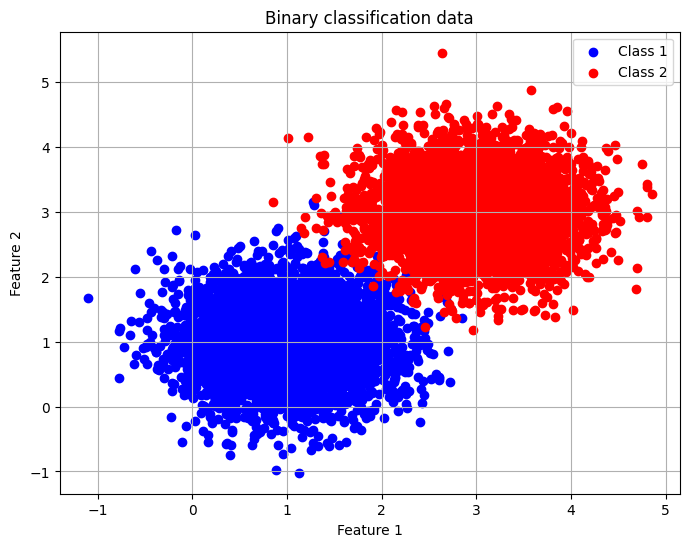

In [ ]:
##################################################
#Generating binary classification data (linearly separable)
##################################################
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(42)

mean1 = [1,1]
mean2 = [3,3]
cov = [[0.3,0],[0,0.3]]
class1_tr = np.random.multivariate_normal(mean1, cov, size=(4500))
class2_tr = np.random.multivariate_normal(mean2, cov, size=(4500))

tr_data = np.concatenate([class1_tr, class2_tr], axis=0)
tr_targets = np.concatenate([np.zeros(len(class1_tr)), np.ones(len(class2_tr))])

class1_te = np.random.multivariate_normal(mean1, cov, size=(500))
class2_te = np.random.multivariate_normal(mean2, cov, size=(500))

te_data = np.concatenate([class1_te, class2_te], axis=0)
te_targets = np.concatenate([np.zeros(len(class1_te)), np.ones(len(class2_te))])

# Plot the data
plt.figure(figsize=(8, 6))
plt.scatter(class1_tr[:, 0], class1_tr[:, 1], color='blue', label='Class 1')
plt.scatter(class2_tr[:, 0], class2_tr[:, 1], color='red', label='Class 2')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Binary classification data')
plt.legend()
plt.grid(True)
plt.show()


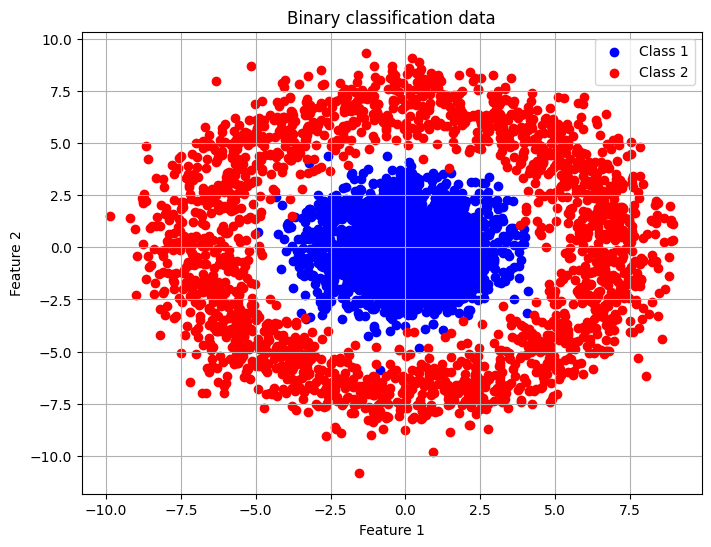

In [ ]:
##################################################
#Generating binary classification data (non-linearly separable)
##################################################
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(42)
# Function to generate data for concentric circles
def generate_concentric_data(n_samples, radius1,radius2, noise_std):
    # Generate random angles
    angles = np.random.rand(n_samples) * 2 * np.pi
    noise = noise_std*np.random.randn(n_samples)
    # Generate inner and outer circles
    inner_circle = np.array([(radius1 + noise) * np.cos(angles), (radius1 + noise) * np.sin(angles)]).T
    outer_circle = np.array([(radius2 + noise) * np.cos(angles), (radius2 + noise) * np.sin(angles)]).T
    return inner_circle, outer_circle

# Generate data for two classes
n_samples = 2000  # Number of samples for each class
radius1 = 2  # Radius of inner circle
radius2 = 7  # Radius of inner circle
noise_std = 1   # Noise to be added to radius

class1_data, class2_data = generate_concentric_data(n_samples, radius1,radius2,noise_std)

# Plot the data
plt.figure(figsize=(8, 6))
plt.scatter(class1_data[:, 0], class1_data[:, 1], color='blue', label='Class 1')
plt.scatter(class2_data[:, 0], class2_data[:, 1], color='red', label='Class 2')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Binary classification data')
plt.legend()
plt.grid(True)
plt.show()



In [ ]:
####################################################
#Creating functions for Logistice Regression and FF Neural Network
####################################################
# This function was taken from lab 03
# Logistic Regression function
def Logistic_Regression(X_train, Y_train, X_test):
    #Inputs: Training data, Training labels, and Testing data
    #Outputs: Predictions on test data

    max_iter = 100  # max number of iterations for parameter update
    threshold = 0.5  # threshold for classification
    X = np.hstack((X_train, np.ones((X_train.shape[0], 1))))  # Append ones to the training data to take care of the bias
    w = np.zeros((X.shape[1], 1))  # Initialize the weight vector
    for iter in range(max_iter):
        preds = 1 / (1 + np.exp(-np.dot(X, w)))  # Predictions on X. Sigmoid(w^T.x)
        error = preds - Y_train  # Difference between preds and Y_train

        # Compute the gradients and the appropriate learning rate. We can use Hessian matrix as learning rate
        gradient = np.dot(X.T, error)  # Gradient of the loss function
        S = np.diag((preds * (1 - preds)).flatten())  # Diagonal matrix of sigmoid derivatives
        H = np.dot(np.dot(X.T, S), X)  # Hessian matrix
        learning_rate = np.linalg.inv(H)  # Inverse of Hessian as learning rate

        # Update the weight vector
        w -= np.dot(learning_rate, gradient)

    # Test data predictions
    X_test_augmented = np.hstack((X_test, np.ones((X_test.shape[0], 1))))  # Append ones to the test data
    test_preds = 1 / (1 + np.exp(-np.dot(X_test_augmented, w)))  # Predictions on test data

    # Compare the predictions with 0.5, to output the decision
    test_preds = (test_preds >= threshold).astype(int)

    # Return the predicted test labels
    return test_preds, w

def visualise(w, tr_data, te_data, te_targets, lr=True):
  # Plot the decision regions
  plt.figure(figsize=(7, 5))
  # Define x_min and x_max based on the training data
  x_min, x_max = tr_data[:, 0].min() - 1, tr_data[:, 0].max() + 1

  # Compute the decision boundary line
  x_vals = np.linspace(x_min, x_max, 100)
  y_vals = -(w[0] * x_vals + w[2]) / w[1]

  # Plot the decision boundary line
  plt.plot(x_vals, y_vals, color='black', linestyle='--', label='Decision Boundary')

  # Overlay the test points
  plt.scatter(te_data[te_targets.flatten() == 0][:, 0], te_data[te_targets.flatten() == 0][:, 1], color='blue', label='Class 1 (Test)', edgecolor='k')
  plt.scatter(te_data[te_targets.flatten() == 1][:, 0], te_data[te_targets.flatten() == 1][:, 1], color='red', label='Class 2 (Test)', edgecolor='k')

  # Add labels, legend, and title
  plt.xlabel('$x_1$')
  plt.ylabel('$x_2$')
  if(lr):
    plt.title('Logistic regression decision regions')
  else:
    plt.title('Neural network decision regions')
  plt.ylim(-2.5, 7.5)
  plt.legend()
  plt.grid()
  plt.tight_layout()
  plt.gcf().set_dpi(100)  # Set the DPI for sharper image
  plt.show()

import numpy as np

def train_and_predict_DNN(X_train, y_train, X_test, input_dim=2, hidden1=3, hidden2=3, output_dim=1, lr=0.01, epochs=5000):
  # Initialize weights and biases
  W1 = np.random.randn(hidden1, input_dim) * np.sqrt(2/input_dim)  # He init
  b1 = np.zeros((hidden1, 1))
  W2 = np.random.randn(hidden2, hidden1) * np.sqrt(2/hidden1)
  b2 = np.zeros((hidden2, 1))
  W3 = np.random.randn(output_dim, hidden2) * np.sqrt(1/hidden2)  # Xavier
  b3 = np.zeros((output_dim, 1))

  # Activation functions and loss inside the function
  def ReLu(x):
      return np.maximum(0, x)

  def gradReLu(x):
      return (x > 0).astype(float)

  def sigmoid(x):
      return 1 / (1 + np.exp(-x))

  def loss_function(y_true, y_pred):
      y_pred = np.clip(y_pred, 1e-10, 1 - 1e-10)
      return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

  # Prepare inputs
  X = X_train.T
  y = y_train.reshape(1, -1)

  for epoch in range(epochs):
      # Shuffle data for SGD
      permutation = np.random.permutation(X.shape[1])
      X_shuffled = X[:, permutation]
      y_shuffled = y[:, permutation]

      batch_size = 32
      # SGD loop
      for i in range(0, X_train.shape[1], batch_size):
          # Get batch
          X_batch = X_shuffled[:, i:i+batch_size]
          y_batch = y_shuffled[:, i:i+batch_size]

          # -------------------
          # Forward pass (vectorized for whole batch)
          z1 = W1 @ X_batch + b1
          a1 = ReLu(z1)
          z2 = W2 @ a1 + b2
          a2 = ReLu(z2)
          z3 = W3 @ a2 + b3
          a3 = sigmoid(z3)

          # -------------------
          # Backward pass
          dz3 = a3 - y_batch
          dW3 = (dz3 @ a2.T) / batch_size  # Average over batch
          db3 = np.mean(dz3, axis=1, keepdims=True)

          dz2 = (W3.T @ dz3) * gradReLu(z2)
          dW2 = (dz2 @ a1.T) / batch_size
          db2 = np.mean(dz2, axis=1, keepdims=True)

          dz1 = (W2.T @ dz2) * gradReLu(z1)
          dW1 = (dz1 @ X_batch.T) / batch_size
          db1 = np.mean(dz1, axis=1, keepdims=True)

          # Update parameters
          W3 -= lr * dW3
          b3 -= lr * db3
          W2 -= lr * dW2
          b2 -= lr * db2
          W1 -= lr * dW1
          b1 -= lr * db1

  # After training, make predictions on test set
  X_test_T = X_test.T
  z1 = W1 @ X_test_T + b1
  a1 = ReLu(z1)
  z2 = W2 @ a1 + b2
  a2 = ReLu(z2)
  z3 = W3 @ a2 + b3
  a3 = sigmoid(z3)
  predictions = (a3.T.squeeze() > 0.5).astype(int)

  return predictions, a2

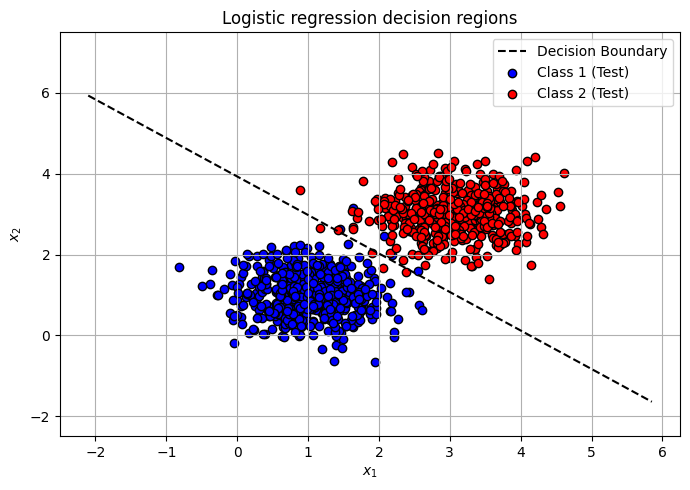

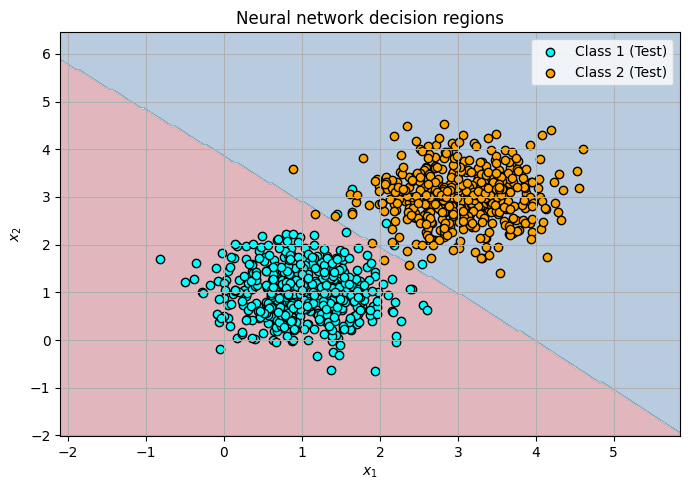


Accuracy on linear classification with Logistic_Regression 99.10%
Accuracy on linear classification with Neural network 99.10%
Accuracy of the models on test data is the same!


In [ ]:
##################################################
#Classify the linearly separable data using linear classification models
##################################################
test_preds, w = Logistic_Regression(tr_data, tr_targets.reshape(-1, 1), te_data)
accuracy_lr = np.mean(test_preds.flatten() == te_targets) * 100
visualise(w, tr_data, te_data, te_targets.reshape(-1, 1))

##################################################
#Classify the linearly separable dataa using deep neural based classification models
##################################################
# Train the deep neural network
dnn_preds, _ = train_and_predict_DNN(tr_data, tr_targets, te_data, input_dim=2, hidden1=3, hidden2=3, output_dim=1, lr=0.01, epochs=10000)

# Create a grid of points
x_min, x_max = tr_data[:, 0].min() - 1, tr_data[:, 0].max() + 1
y_min, y_max = tr_data[:, 1].min() - 1, tr_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200), np.linspace(y_min, y_max, 200))
grid_points = np.c_[xx.ravel(), yy.ravel()]

# Predict for each point in the grid
grid_preds, _ = train_and_predict_DNN(tr_data, tr_targets, grid_points, input_dim=2, hidden1=3, hidden2=3, output_dim=1, lr=0.01, epochs=10000)

# Reshape predictions to match the grid shape
grid_preds = grid_preds.reshape(xx.shape)

# Plot the decision regions
plt.figure(figsize=(7, 5))
plt.contourf(xx, yy, grid_preds, alpha=0.3, cmap=plt.cm.RdBu)

# Overlay the test points
plt.scatter(te_data[te_targets == 0][:, 0], te_data[te_targets == 0][:, 1], color='cyan', label='Class 1 (Test)', edgecolor='k')
plt.scatter(te_data[te_targets == 1][:, 0], te_data[te_targets == 1][:, 1], color='orange', label='Class 2 (Test)', edgecolor='k')

# Add labels, legend, and title
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.title('Neural network decision regions')
plt.legend()
plt.grid()
plt.tight_layout()
plt.gcf().set_dpi(100)  # Set the DPI for sharper image
plt.show()

accuracy = np.mean(dnn_preds.flatten() == te_targets) * 100

##################################################
#Compare the performance of both the models on linearly separable data
##################################################
print(f"\nAccuracy on linear classification with Logistic_Regression {accuracy_lr:.2f}%")
print(f"Accuracy on linear classification with Neural network {accuracy:.2f}%")
print("Accuracy of the models on test data is the same!")


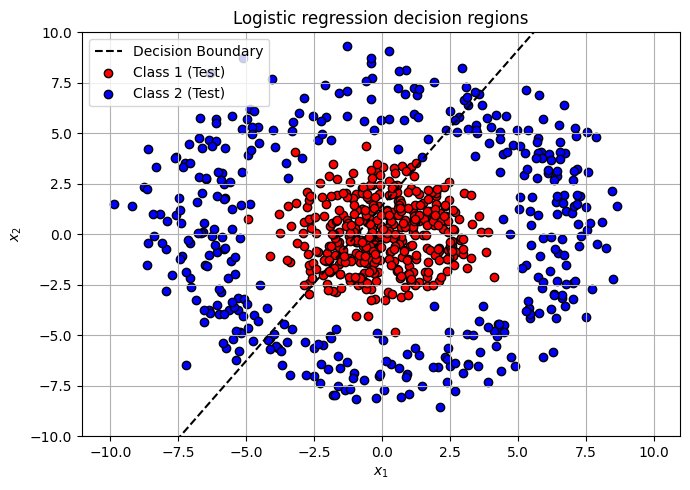

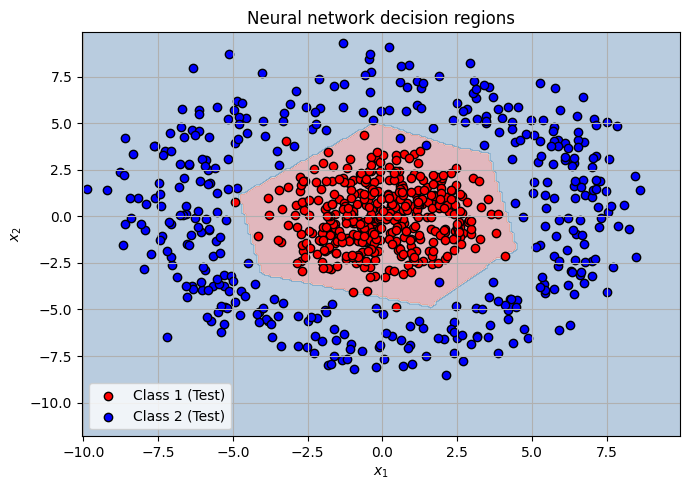

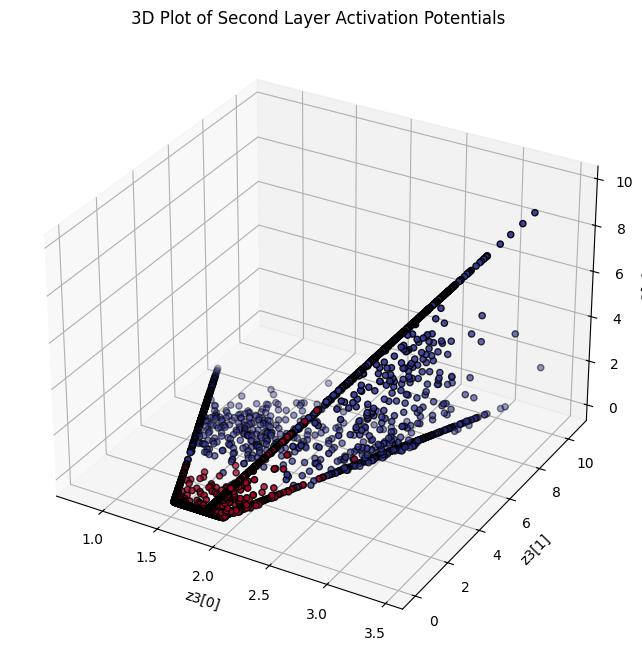


Accuracy on non-linear classification with Logistic_Regression 43.12%
Accuracy on non-linear classification with Neural network 98.75%
Accuracy of the models on test data are very different!


In [ ]:
##################################################
#Classify the non-linearly separable data using linear classification models
##################################################
# prepare data from case 02
# Assign targets to the data
class1_targets = np.zeros(len(class1_data))
class2_targets = np.ones(len(class2_data))

# Combine the data and targets
data = np.vstack((class1_data, class2_data))
targets = np.hstack((class1_targets, class2_targets))

# Shuffle the data
indices = np.arange(len(data))
np.random.shuffle(indices)
data = data[indices]
targets = targets[indices]

# Split into training and test data (80% training, 20% testing)
split_idx = int(0.8 * len(data))
tr_data2, te_data2 = data[:split_idx], data[split_idx:]
tr_targets2, te_targets2 = targets[:split_idx], targets[split_idx:]

def visualise(w, tr_data, te_data, te_targets, lr=True):
  # Plot the decision regions
  plt.figure(figsize=(7, 5))
  # Define x_min and x_max based on the training data
  x_min, x_max = tr_data[:, 0].min() - 1, tr_data[:, 0].max() + 1

  # Compute the decision boundary line
  x_vals = np.linspace(x_min, x_max, 100)
  y_vals = -(w[0] * x_vals + w[2]) / w[1]

  # Plot the decision boundary line
  plt.plot(x_vals, y_vals, color='black', linestyle='--', label='Decision Boundary')

  # Overlay the test points
  plt.scatter(te_data[te_targets.flatten() == 0][:, 0], te_data[te_targets.flatten() == 0][:, 1], color='red', label='Class 1 (Test)', edgecolor='k')
  plt.scatter(te_data[te_targets.flatten() == 1][:, 0], te_data[te_targets.flatten() == 1][:, 1], color='blue', label='Class 2 (Test)', edgecolor='k')

  # Add labels, legend, and title
  plt.xlabel('$x_1$')
  plt.ylabel('$x_2$')
  if(lr):
    plt.title('Logistic regression decision regions')
  else:
    plt.title('Neural network decision regions')
  plt.ylim(-10, 10)
  plt.legend()
  plt.grid()
  plt.tight_layout()
  plt.gcf().set_dpi(100)  # Set the DPI for sharper image
  plt.show()

# Logistic Regression
test_preds2, w = Logistic_Regression(tr_data2, tr_targets2.reshape(-1, 1), te_data2)
accuracy_lr = np.mean(test_preds2.flatten() == te_targets2) * 100
visualise(w, tr_data2, te_data2, te_targets2.reshape(-1, 1))

##################################################
#Classify the non-linearly separable data using deep neural based classification models
##################################################
# Train the deep neural network
dnn_preds2, _ = train_and_predict_DNN(tr_data2, tr_targets2, te_data2, input_dim=2, hidden1=3, hidden2=3, output_dim=1, lr=0.01, epochs=10000)
_, z3 = train_and_predict_DNN(tr_data2, tr_targets2, tr_data2, input_dim=2, hidden1=3, hidden2=3, output_dim=1, lr=0.01, epochs=10000)

# Create a grid of points
x_min, x_max = tr_data2[:, 0].min() - 1, tr_data2[:, 0].max() + 1
y_min, y_max = tr_data2[:, 1].min() - 1, tr_data2[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200), np.linspace(y_min, y_max, 200))
grid_points = np.c_[xx.ravel(), yy.ravel()]

# Predict for each point in the grid
grid_preds, _ = train_and_predict_DNN(tr_data2, tr_targets2, grid_points, input_dim=2, hidden1=3, hidden2=3, output_dim=1, lr=0.01, epochs=10000)

# Reshape predictions to match the grid shape
grid_preds = grid_preds.reshape(xx.shape)

# Plot the decision regions
plt.figure(figsize=(7, 5))
plt.contourf(xx, yy, grid_preds, alpha=0.3, cmap=plt.cm.RdBu)

# Overlay the test points
plt.scatter(te_data2[te_targets2 == 0][:, 0], te_data2[te_targets2 == 0][:, 1], color='red', label='Class 1 (Test)', edgecolor='k')
plt.scatter(te_data2[te_targets2 == 1][:, 0], te_data2[te_targets2 == 1][:, 1], color='blue', label='Class 2 (Test)', edgecolor='k')

# Add labels, legend, and title
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.title('Neural network decision regions')
plt.legend()
plt.grid()
plt.tight_layout()
plt.gcf().set_dpi(100)  # Set the DPI for sharper image
plt.show()

accuracy = np.mean(dnn_preds2.flatten() == te_targets2) * 100

# Plot the second layer activation potentials (z3) in 3D
fig = plt.figure(figsize=(11, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with colors based on the targets
ax.scatter(z3[2, :], z3[0, :], z3[1, :], c=tr_targets2, cmap=plt.cm.RdYlBu, s=20, edgecolor='k')

# Add labels and title
ax.set_xlabel('z3[0]')
ax.set_ylabel('z3[1]')
ax.set_zlabel('z3[2]')
ax.set_title('3D Plot of Second Layer Activation Potentials')

plt.show()

##################################################
#Compare the performance of both the models on non-linearly separable data
##################################################
print(f"\nAccuracy on non-linear classification with Logistic_Regression {accuracy_lr:.2f}%")
print(f"Accuracy on non-linear classification with Neural network {accuracy:.2f}%")
print("Accuracy of the models on test data are very different!")


<b> Report your observations </b>
1. Accuracy on linear classification with Logistic_Regression 99.10% \\
Accuracy on linear classification with Neural network 99.10% \\
Accuracy of the models on test data is the same!

2. Accuracy on non-linear classification with Logistic_Regression 43.12% \\
Accuracy on non-linear classification with Neural network 98.75% \\
Accuracy of the models on test data are very different!

1. Both logistic regression and neural network perform equally well on the linearly separable data set (99% accuracy).

2. Logistic regression does not work when the data is not linearly separable. All layers of the neural network except the last one are dedicated to doing a **non-linear data-dependent transformation** of the inputs to a higher dimensional space so that the data becomes linearly separable. \\
In this space, logistic regression (in the last layer) works well.\
So neural networks outperform logistic regression on non-linear classification (99% v/s 43%).  

3. **Intialization is everything**: The NN performs very well when intialised using **Glorot**, but otherwise the accuracy is as low as 50% even after 10000 epochs.

3. When we plot the 3d transformation in the last layer, we can clearly see the outer ring points have been lifted up along a parabola so that they become linearly separable.

